In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json
import os
plt.rcParams["figure.figsize"] = (15,15)

In [157]:
results_fn = 'human_results2.json'

with open(results_fn) as f: 
    results = json.load(f)
print(results.keys())
print(results['fps'])

dict_keys(['res', 'type', 'fps'])
2.8888710766141634


In [136]:
results['res']

[[2000.0, 705.0, 50.0, 130.0],
 [2000.0, 705.0, 50.0, 128.0],
 [2001.0, 706.0, 49.0, 128.0],
 [2001.0, 707.0, 49.0, 126.0],
 [2001.0, 706.0, 50.0, 127.0],
 [2002.0, 706.0, 50.0, 126.0],
 [2002.0, 706.0, 50.0, 127.0],
 [2004.0, 706.0, 48.0, 128.0],
 [2004.0, 706.0, 48.0, 127.0],
 [2003.0, 704.0, 49.0, 131.0],
 [2004.0, 705.0, 49.0, 130.0],
 [2004.0, 705.0, 48.0, 130.0],
 [2005.0, 705.0, 49.0, 130.0],
 [2006.0, 705.0, 47.0, 129.0],
 [2006.0, 705.0, 47.0, 132.0],
 [2006.0, 705.0, 48.0, 131.0],
 [2007.0, 704.0, 47.0, 130.0],
 [2007.0, 706.0, 47.0, 130.0],
 [2008.0, 705.0, 47.0, 130.0],
 [2007.0, 704.0, 48.0, 131.0],
 [2006.0, 703.0, 51.0, 132.0],
 [2006.0, 703.0, 50.0, 132.0],
 [2007.0, 703.0, 49.0, 133.0],
 [2008.0, 704.0, 48.0, 132.0],
 [2009.0, 705.0, 48.0, 128.0],
 [2009.0, 705.0, 48.0, 129.0],
 [2009.0, 705.0, 48.0, 127.0],
 [2009.0, 705.0, 47.0, 127.0],
 [2009.0, 704.0, 49.0, 128.0],
 [2009.0, 705.0, 48.0, 128.0],
 [2009.0, 703.0, 48.0, 131.0],
 [2010.0, 704.0, 47.0, 129.0],
 [2010.0

In [158]:
res = results['res']
frame_folder = 'shark_frames/20200805_OneSharkSUPFollowsKids/'
imgs = sorted(os.listdir(frame_folder))
paths = [f'{frame_folder}/{f}' for f in imgs]
imgs[0], imgs[-1], len(imgs)

('20200805_OneSharkSUPFollowsKids-0001.jpg',
 '20200805_OneSharkSUPFollowsKids-1654.jpg',
 1654)

[1865  504   71  171]
(1865, 504) (1936, 675)
(2160, 3840)


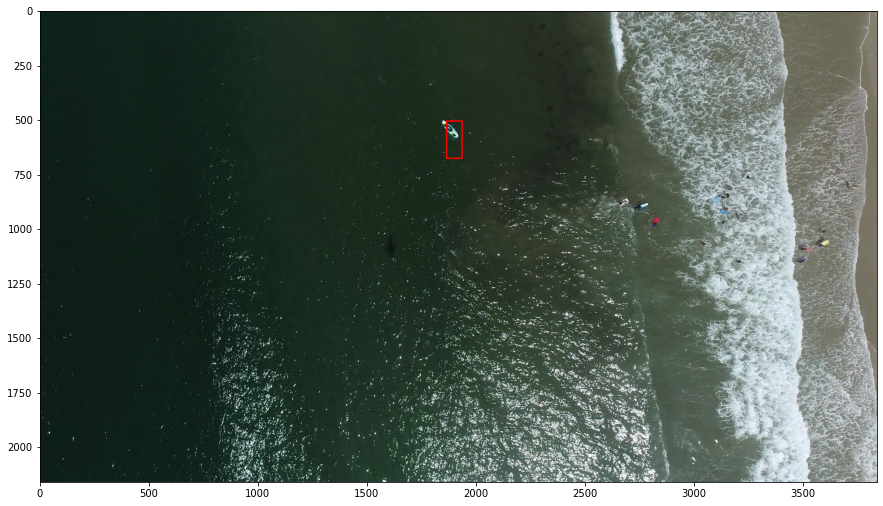

In [159]:
# person results 
og = np.array(res[-1]).astype(int)
print(og)
s = tuple(og[:2])
e = tuple(og[:2] + og[2:])
print(s, e)
fn = paths[-1]
color = (255, 0, 0)
image = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB)
print(image.shape[:2])
# Line thickness of -1 px
# Thickness of -1 will fill the entire shape
thickness = 5
image2 = cv2.rectangle(image, s, e, color, thickness)
# call imshow() using plt object
plt.imshow(image2)
 
# display that image
plt.show()

In [140]:
frame_num = len(imgs)

In [149]:
output_folder =  './20200805_OneSharkSUPFollowsKids_result2'
colors = {'human_results2.json': (255, 0, 0), 
          'human_results.json': (255, 0, 0), 
         'shark_results.json': (0, 255, 0)}
thickness = 5

## draw bounding boxes on each frame

In [173]:
results_fns = ['human_results.json', 'shark_results.json']
res_dicts = {}
for fn in results_fns:
    with open(fn) as f: 
        res_dicts[fn] = json.load(f)
    assert(frame_num == len(res_dicts[fn]['res']))

print(res_dicts['human_results.json']['res'][0])

[2005.0, 712.0, 44.0, 111.0]


0


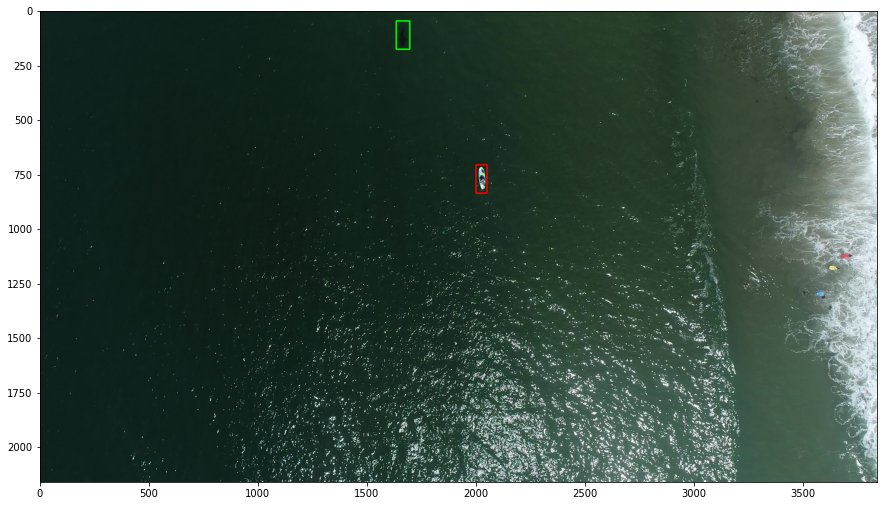

1600


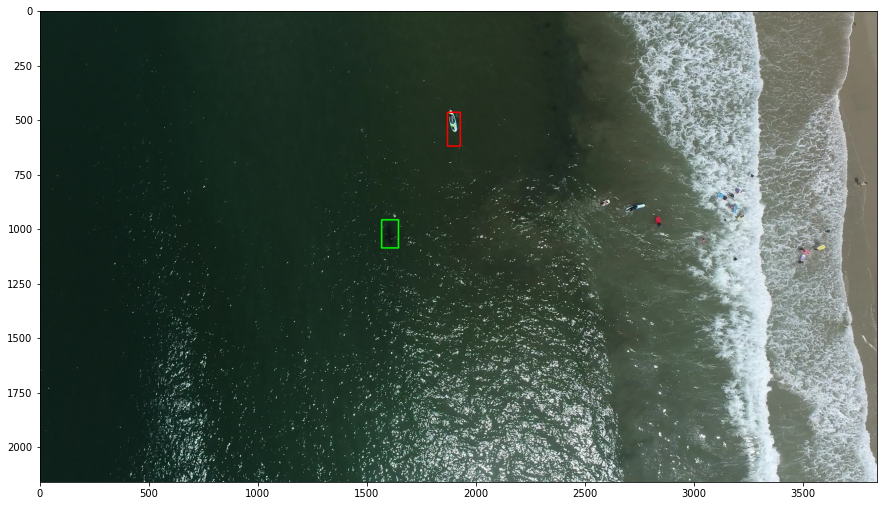

In [172]:
# add text later 
# show every 500
show=1600

for i in range(frame_num):
    fn = paths[i]
    image = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB)
    for k, v in res_dicts.items():
        color = colors[k]
        rects = np.array(v['res'][i]).astype(int)
        s = tuple(rects[:2])
        e = tuple(rects[:2] + rects[2:])
        image = cv2.rectangle(image, s, e, color, thickness)
    out_fn = f'{output_folder}/{imgs[i]}'
    if not cv2.imwrite(out_fn, image):
        print(out_fn)
    if i%show == 0:
        print(i)
        plt.imshow(image)
        plt.show()

In [174]:
results_fns = ['human_results2.json']
for fn in results_fns:
    with open(fn) as f: 
        res_dicts[fn] = json.load(f)
    assert(frame_num == len(res_dicts[fn]['res']))
print(res_dicts['human_results2.json']['res'][0])

[2000.0, 705.0, 50.0, 130.0]


0


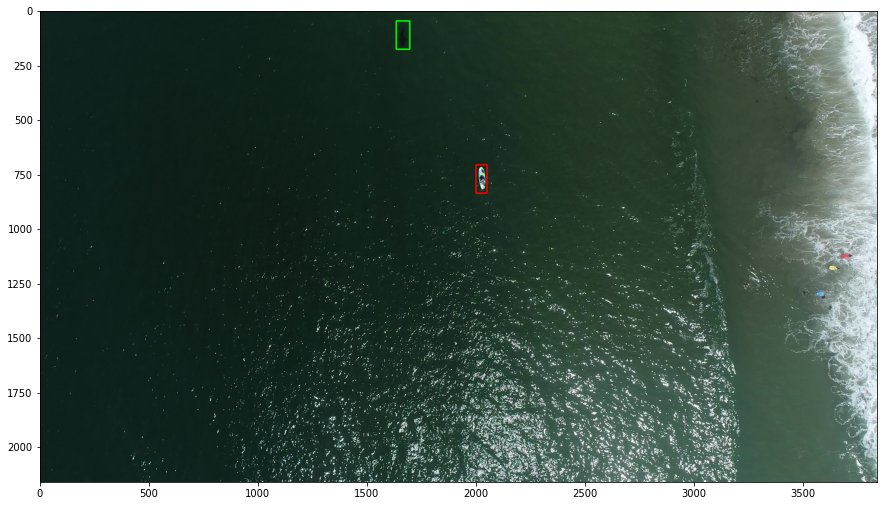

1600


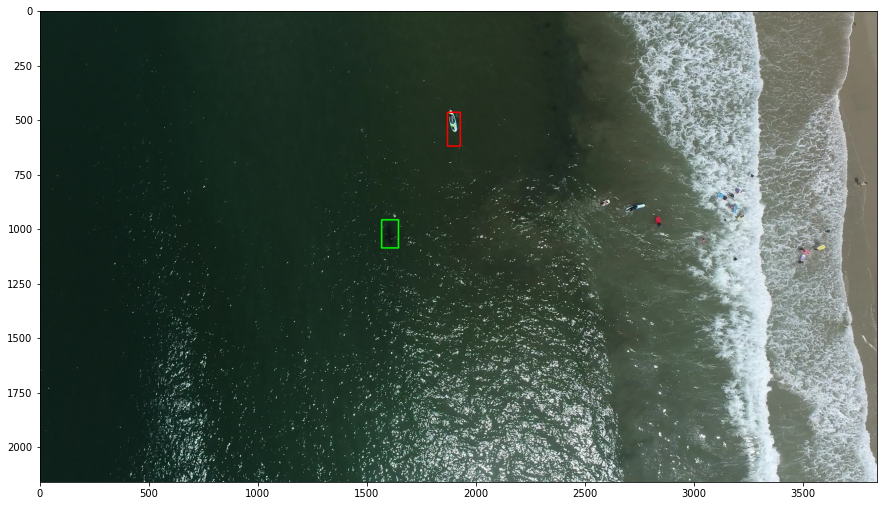

In [175]:
show=1600
for i in range(frame_num):
    fn = paths[i]
    image = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB)
    for k, v in res_dicts.items():
        color = colors[k]
        rects = np.array(v['res'][i]).astype(int)
        s = tuple(rects[:2])
        e = tuple(rects[:2] + rects[2:])
        image = cv2.rectangle(image, s, e, color, thickness)
    out_fn = f'{output_folder}/{imgs[i]}'
    if not cv2.imwrite(out_fn, image):
        print(out_fn)
    if i%show == 0:
        print(i)
        plt.imshow(image)
        plt.show()

## Figuring out the framerate

In [95]:
ls shark_human_annotations/20200805_OneSharkSUPFollowsKids.mp4

shark_human_annotations/20200805_OneSharkSUPFollowsKids.mp4


In [87]:
!for files in shark_human_annotations/*.mp4; do (ffprobe -v error -select_streams v:0 -show_entries stream=avg_frame_rate -of default=nw=1:nk=1 "${files}") done

827000000/27594233
485000000/16182833
714500000/23840483
344000000/11478133
111500000/3720383
695000000/23189833
605000000/20186833
875000000/29195833
30000/1001
1130000000/38311771
1067000000/35602233
1280000000/42709333
246500000/8224883
276500000/9225883
30000/1001
419000000/13980633
30000/1001
299000000/9976633
1025000000/34200833
830000000/27694333
30000/1001


In [97]:
fpss = '''827000000/27594233
485000000/16182833
714500000/23840483
344000000/11478133
111500000/3720383
695000000/23189833
605000000/20186833
875000000/29195833
30000/1001
1130000000/38311771
1067000000/35602233
1280000000/42709333
246500000/8224883
276500000/9225883
30000/1001
419000000/13980633
30000/1001
299000000/9976633
1025000000/34200833
830000000/27694333
30000/1001'''.split('\n')

for eqn in fpss:
    i, j = eqn.split('/')
    i , j = int(i), int(j)
    print(round(i/j))

30
30
30
30
30
30
30
30
30
29
30
30
30
30
30
30
30
30
30
30
30


In [118]:
ls 20200805_OneSharkSUPFollowsKids_result/*.jpg |less

20200805_OneSharkSUPFollowsKids_result/20200805_OneSharkSUPFollowsKids-0001.jpg
20200805_OneSharkSUPFollowsKids_result/20200805_OneSharkSUPFollowsKids-0002.jpg
20200805_OneSharkSUPFollowsKids_result/20200805_OneSharkSUPFollowsKids-0003.jpg
20200805_OneSharkSUPFollowsKids_result/20200805_OneSharkSUPFollowsKids-0004.jpg
20200805_OneSharkSUPFollowsKids_result/20200805_OneSharkSUPFollowsKids-0005.jpg
20200805_OneSharkSUPFollowsKids_result/20200805_OneSharkSUPFollowsKids-0006.jpg
20200805_OneSharkSUPFollowsKids_result/20200805_OneSharkSUPFollowsKids-0007.jpg
20200805_OneSharkSUPFollowsKids_result/20200805_OneSharkSUPFollowsKids-0008.jpg
20200805_OneSharkSUPFollowsKids_result/20200805_OneSharkSUPFollowsKids-0009.jpg
20200805_OneSharkSUPFollowsKids_result/20200805_OneSharkSUPFollowsKids-0010.jpg
20200805_OneSharkSUPFollowsKids_result/20200805_OneSharkSUPFollowsKids-0011.jpg
20200805_OneSharkSUPFollowsKids_result/20200805_OneSharkSUPFollowsKids-0012.jpg
20200805_OneSharkSUPFollowsKids_result/2

In [120]:
!ffmpeg -framerate 30 -pattern_type glob -i '20200805_OneSharkSUPFollowsKids_result/*.jpg' -c:v libx264 -pix_fmt yuv420p 20200805_OneSharkSUPFollowsKids_result.mp4
    
    
    
    
    
    
    

ffmpeg version 5.0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.0.0 (clang-1300.0.29.30)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/5.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox
 